<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab3_Basic_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task # 1: **Image Binarization using a predefined global threshold**

In [ ]:
#import required packages
import numpy as np
from PIL import Image

#function to binarize an image
def binarize(img):
    threshold = 128 #set the custom threshold value to 128
    w,h = img.size #set width and height of the image using size function
    gray_img = np.array(img.convert('L')) # first convert the image to grayscale and then to 2d numpy array to make thresholding easier
    
    #use double for loop to iterate each pixel
    for i in range(h):
        for j in range(w):
            #if the pixel value is greater than the threshold then set it to maximum value
            if (gray_img[i][j] > threshold):
                gray_img[i][j] = 255

            #else if the pixel value is lesser than the threshold then set it to minimum value
            else:
                gray_img[i][j] = 0
    #return the binarized image from the numpy 2d array
    return Image.fromarray(np.uint8(gray_img))
                
    
input = Image.open('B3.jpg') #read the image
input.show() # display original image
binarize(input).show() # display binarized image


## Task # 2: **Create Intensity Histogram from a Greyscale image**

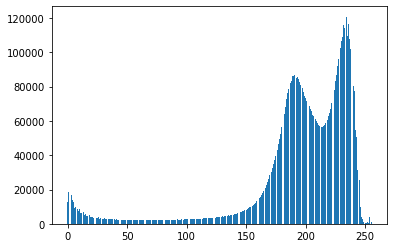

In [ ]:
#import required packages
from PIL import Image
import matplotlib.pyplot as plt

#read the input image and convert to grayscale to get uniform intensity of each pixel
input = Image.open('B2.jpg').convert('L')

hist = {} #a set for histogram named hist
w,h = input.size #set width and height of the image using size function

#initialize the hisogram set with zeroes
for p in range(256):
    hist[p] = 0
#use double for loop to iterate each pixel
for i in range(w):
    for j in range(h):
        coordinate = (i,j) #make a coordinate of two variables i and j
        hist[(input.getpixel(coordinate))] += 1 #getpixel function provides image data at pixel level which is incremented in case a sampe intensity pixel value is found

fig = plt.figure() #define an instance of a figure
plt.bar([i for i in range (256)], hist.values() ) #plot the bar graph using 255 values in the x axis and the intensity levels on y axis
plt.show() # display the histogram

## Task # 3: **Recursive XY-cut algorithm** 

In [ ]:
# Important Imports
import numpy as np
from PIL import Image
from scipy.signal import find_peaks

# image = PIL.Image, n = Number of Segments
# ignoreBottomTop = Segmentation of top and bottom of Image
# axis = 0 (for vertical-lines) or 1 (for horizontal-lines)
# Returns a gray image, PIL Image.
def recursiveXYCut(image, n, ignoreBottomTop = True, axis = 1):
    image = image.convert('L')
    image_arr = np.asarray(image)
    # distance for peaks
    distance = image_arr.shape[0 if axis == 1 else 1]/n
    # Sum the pixels along given axis
    sum_vals = image_arr.sum(axis = axis)
    # Get the indices of the peaks
    peaks, _ = find_peaks(sum_vals, distance=distance)
    # Temp variable to create segment lines i.e. 0 out the required values.
    temp = np.ones(image_arr.shape)
    # Skip top and bottom segmentation or not (depends on the param)
    #for peak in peaks[1:-1 if ignoreBottomTop else ]:
    for peak in peaks[1:-1] if ignoreBottomTop else peaks:
        if axis == 1:
            temp[range(peak-2, peak+2)] = 0
        else:
            temp[:, range(peak-2, peak+2)] = 0
    return Image.fromarray(np.uint8(image_arr * temp))

input = Image.open('XY-cuts.png')
input.show()
recursiveXYCut(input, 6).show()

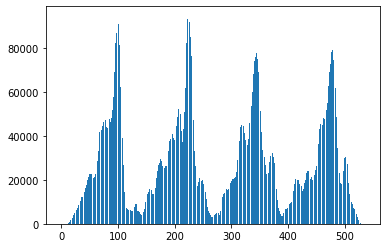

In [ ]:
#import required packages
import cv2
import numpy as np 
import matplotlib.pyplot as plt

input = cv2.imread("XY-cuts.png", 0) #read image using opencv and convert RGB to Grayscale to obtain direct intensities by setting flag to 0
img = 255-img #obtain negative of image to obtain peaks where post of the black pixels are present as black pixel has 0 intensity value

img_row_sum = np.sum(img,axis=1).tolist() #convert the sum of pixels value into a single list by height(since axis is 1)
h, w = img.shape #set height and width of the image using shape function

fig = plt.figure() #define an instance of a figure
plt.bar([i for i in range (h)], img_row_sum) #plot the bar graph using 255 values in the x axis and the sum of intensities on y axis
plt.show() #display the histogram

In [ ]:
line = [140, 265, 390] # select custom vales manually from the histogram with lowest intensities
input = (Image.open('XY-cuts.png')).convert('L') # read image into input varaible and convert to grayscale to get consistent intensities
w,h = input.size #set width and height of the image using size function
output = np.array(input) #convert image to a 2d array

#use double for loop to iterate the list and then x axis of the image
for i in line:
    for j in range(w):
            output[i][j] = 0 #blacken the whole line of the specified y coordinates in the list to segregate the image

output_img = Image.fromarray(np.uint8(output)) #convert image back from 2d array
output_img.show() #display the output image

            

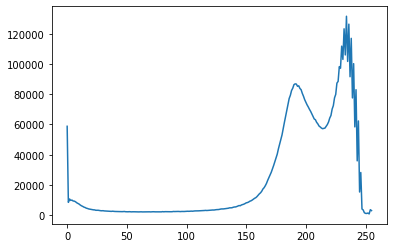

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('B2.jpg',0)
histogram = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram)
plt.show()